## Bull call spread
A bull call spread strategy is built by going long on call option and simultaneously selling a higher strike call option. This strategy aims to benefit from small positive movements in the stock. In this notebook, we will build the payoff graph for long 920 strike call and short 940 strike call on Infosys.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# For making an attractive and informative statistical graph
plt.style.use('seaborn-v0_8-darkgrid')

## Call payoff
We define a function that calculates the payoff from buying a call option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the call option and the premium of the call option as input. It returns the call option payoff.

In [2]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

## Define parameters

We define various parameters required to calculate the call payoff. One of the parameters is the range of stock price at expiry.

To calculate the stock price range at the call's expiration, we define a range for the stock price at expiry from -5% to +10% from the spot price. That is from 95% or 0.95 to 110% or 1.1 from the spot price. 
These range values are for illustration purposes and can be changed.

We use `arange` method of numpy to do the same.

Syntax: 
```python
import numpy as np
np.arange(start, end, step)
```

Parameters:
- start: start of the interval.
- end: end of the interval.
- step: Spacing between values.

Returns:
- Evenly spaced values within a given interval.

**Example:**

np.arange(0.95 * spot_price, 1.1 * spot_price, 1)

If the spot price is 100, then the generated numbers are 95, 96, 97,.......108, 109.

Read more on `arange` method <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html" target="_blank"> here</a>. 

In [3]:
# Infosys stock price
spot_price = 900

# Long call
strike_price_long_call = 920
premium_long_call = 15

# Short call
strike_price_short_call = 940
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.95*spot_price, 1.1*spot_price, 1)

## Long 920 strike call payoff

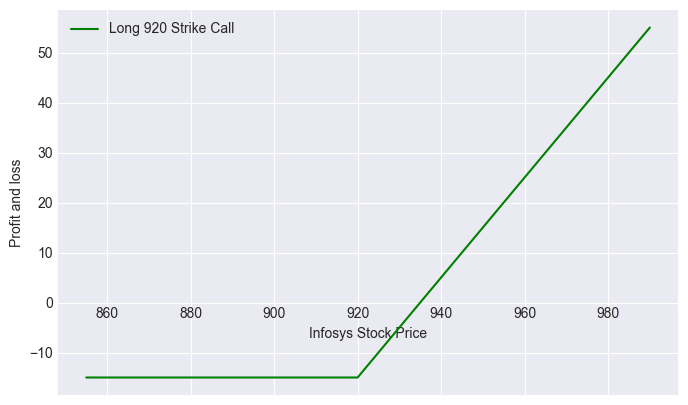

In [4]:
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, label='Long 920 Strike Call', color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Short 940 strike call payoff

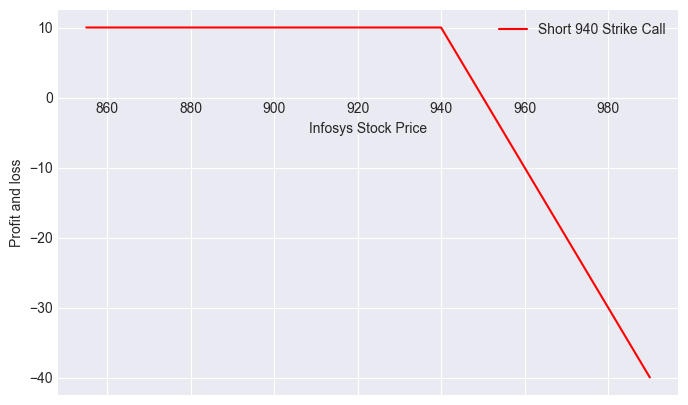

In [5]:
payoff_short_call = call_payoff(
    sT, strike_price_short_call, premium_short_call) * -1.0

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, label='Short 940 Strike Call', color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Bull call spread payoff

Max Profit: 15.0
Max Loss: -5.0


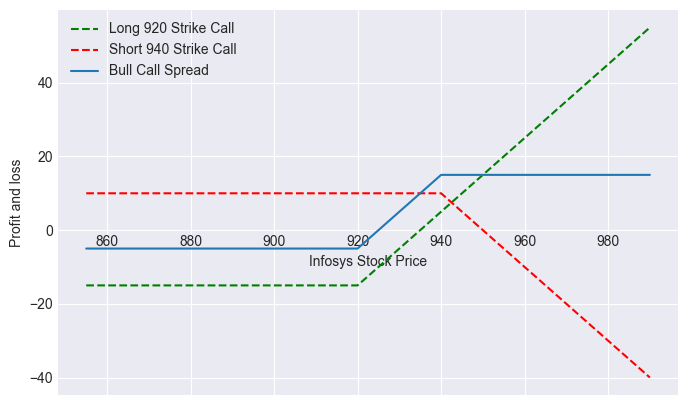

In [6]:
payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print("Max Loss:", min(payoff_bull_call_spread))

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, '--', label='Long 920 Strike Call', color='g')
ax.plot(sT, payoff_short_call, '--', label='Short 940 Strike Call ', color='r')
ax.plot(sT, payoff_bull_call_spread, label='Bull Call Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The max profit is capped at INR 15 and the max loss is limited to INR 5. Therefore, this strategy is suitable when your outlook is moderately bullish on the stock. 
<BR>
